In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('complaints.csv\complaints.csv')

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Kaleb\AppData\Local\Temp\ipykernel_7596\718760230.py:1: SyntaxWarning: invalid escape sequence '\c'
  df=pd.read_csv('complaints.csv\complaints.csv')
C:\Users\Kaleb\AppData\Local\Temp\ipykernel_7596\718760230.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('complaints.csv\complaints.csv')


In [5]:
df.head(10)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692
5,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,77568,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195711
6,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,NV,89107,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195715
7,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,GA,30058,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195718
8,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account information incorrect,NaN,NaN,Experian Information Solutions Inc.,CA,92324,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195719
9,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account information incorrect,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,92324,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195720


In [6]:
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 1.3+

In [7]:
product_counts = df['Product'].value_counts()
print(product_counts)


Product
Credit reporting or other personal consumer reports                             4834855
Credit reporting, credit repair services, or other personal consumer reports    2163857
Debt collection                                                                  799197
Mortgage                                                                         422254
Checking or savings account                                                      291178
Credit card                                                                      226686
Credit card or prepaid card                                                      206369
Money transfer, virtual currency, or money service                               145066
Credit reporting                                                                 140429
Student loan                                                                     109717
Bank account or service                                                           86205
Vehicle loan or lease   

In [8]:
df['narrative_length'] = df['Consumer complaint narrative'].astype(str).apply(lambda x: len(x.split()))
df['narrative_length'].describe()


count    9.609797e+06
mean     5.515649e+01
std      1.495169e+02
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      5.000000e+01
max      6.469000e+03
Name: narrative_length, dtype: float64

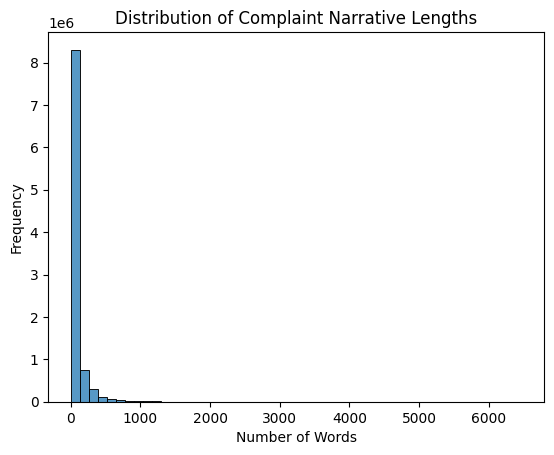

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['narrative_length'], bins=50)
plt.title("Distribution of Complaint Narrative Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


In [11]:
with_narrative = df['Consumer complaint narrative'].notnull().sum()
without_narrative = df['Consumer complaint narrative'].isnull().sum()
print(f"With narratives: {with_narrative}, Without narratives: {without_narrative}")


With narratives: 2980756, Without narratives: 6629041


In [12]:
products_of_interest = [
    'Credit card', 
    'Personal loan', 
    'Buy Now, Pay Later (BNPL)', 
    'Savings account', 
    'Money transfers'
]

df_filtered = df[df['Product'].isin(products_of_interest)]


In [13]:
df_filtered = df_filtered[df_filtered['Consumer complaint narrative'].notnull()]


In [14]:
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'[^a-z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df_filtered['cleaned_narrative'] = df_filtered['Consumer complaint narrative'].apply(clean_text)


In [16]:
df_filtered.to_csv('filtered_complaints.csv', index=False)


In [17]:
ds= pd.read_csv('filtered_complaints.csv')

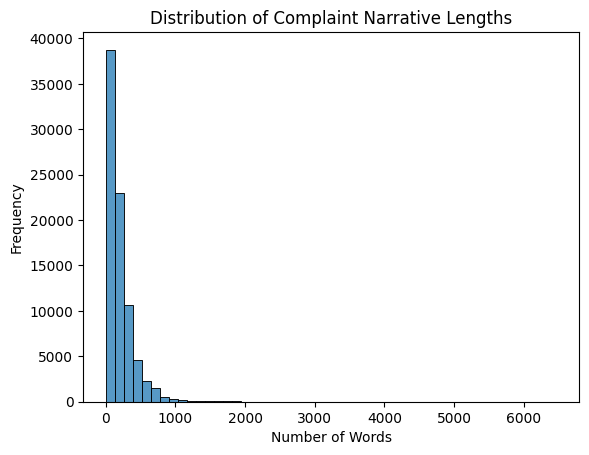

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(ds['narrative_length'], bins=50)
plt.title("Distribution of Complaint Narrative Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


In [19]:
ds.head(10)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,narrative_length,cleaned_narrative
0,2025-06-13,Credit card,Store credit card,Getting a credit card,Card opened without my consent or knowledge,A XXXX XXXX card was opened under my name by a...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,78230,Servicemember,Consent provided,Web,2025-06-13,Closed with non-monetary relief,Yes,NaN,14069121,91,a xxxx xxxx card was opened under my name by a...
1,2025-06-12,Credit card,General-purpose credit card or charge card,"Other features, terms, or problems",Other problem,"Dear CFPB, I have a secured credit card with c...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",NY,11220,NaN,Consent provided,Web,2025-06-13,Closed with monetary relief,Yes,NaN,14047085,156,dear cfpb i have a secured credit card with ci...
2,2025-06-12,Credit card,General-purpose credit card or charge card,Incorrect information on your report,Account information incorrect,I have a Citi rewards cards. The credit balanc...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",IL,60067,NaN,Consent provided,Web,2025-06-12,Closed with explanation,Yes,NaN,14040217,233,i have a citi rewards cards the credit balance...
3,2025-06-09,Credit card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,b'I am writing to dispute the following charge...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,78413,Older American,Consent provided,Web,2025-06-09,Closed with monetary relief,Yes,NaN,13968411,454,bi am writing to dispute the following charges...
4,2025-06-09,Credit card,General-purpose credit card or charge card,Problem when making payments,Problem during payment process,"Although the account had been deemed closed, I...",Company believes it acted appropriately as aut...,Atlanticus Services Corporation,NY,11212,Older American,Consent provided,Web,2025-06-09,Closed with monetary relief,Yes,NaN,13965746,170,although the account had been deemed closed i ...
5,2025-06-11,Credit card,General-purpose credit card or charge card,Problem when making payments,Problem during payment process,I was trying to log into my account and it wou...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,XXXXX,NaN,Consent provided,Web,2025-06-11,Closed with explanation,Yes,NaN,14025020,114,i was trying to log into my account and it wou...
6,2025-06-07,Credit card,Store credit card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,I received an email in XXXX from my XXXX XXXX ...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",CO,80128,Servicemember,Consent provided,Web,2025-06-07,Closed with monetary relief,Yes,NaN,13950990,190,i received an email in xxxx from my xxxx xxxx ...
7,2025-06-06,Credit card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,"I filed a dispute with my bank, Truist, on my ...",Company has responded to the consumer and the ...,TRUIST FINANCIAL CORPORATION,FL,33607,NaN,Consent provided,Web,2025-06-06,Closed with explanation,Yes,NaN,13938213,520,i filed a dispute with my bank truist on my bu...
8,2025-06-10,Credit card,Store credit card,Trouble using your card,Can't use card to make purchases,"Ongoing payment situation with Best Buy, my pa...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",MA,01108,Older American,Consent provided,Web,2025-06-10,Closed with explanation,Yes,NaN,14001321,18,ongoing payment situation with best buy my pay...
9,2025-03-24,Credit card,General-purpose credit card or charge card,Problem wi